# Discrete Bayesian Network: Sprinkler example

## Introduction

The discrete Bayesian network is shown below.

![Network](data/Images/sprinkler.gif "Sprinkler example")

## JAGS model

In [3]:
# Import the required libraries
library(dplyr)
library(ggplot2)
library(gtable)
library(grid)
library(MCMCvis)
library(rjags)

# Ensure the figures are easy to view in the notebook
options(repr.plot.width=8, repr.plot.height=4)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 3
   Total graph size: 28

Initializing model



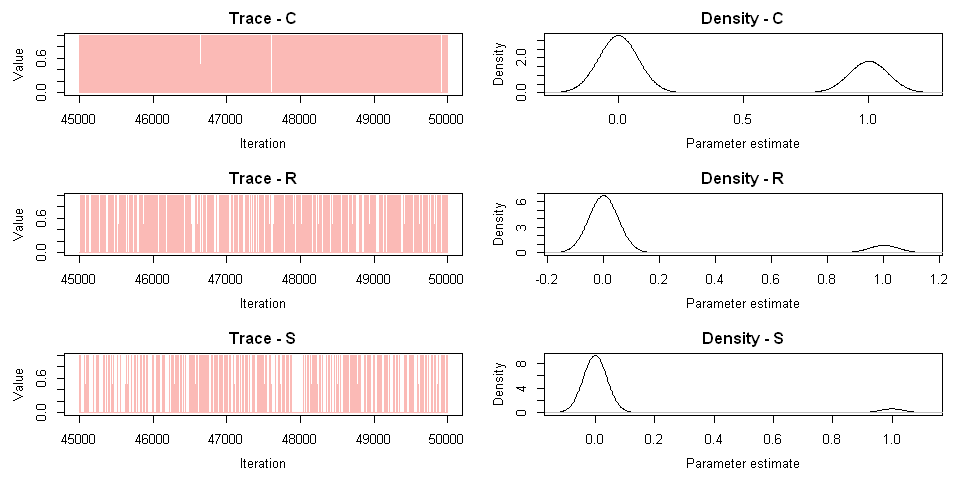

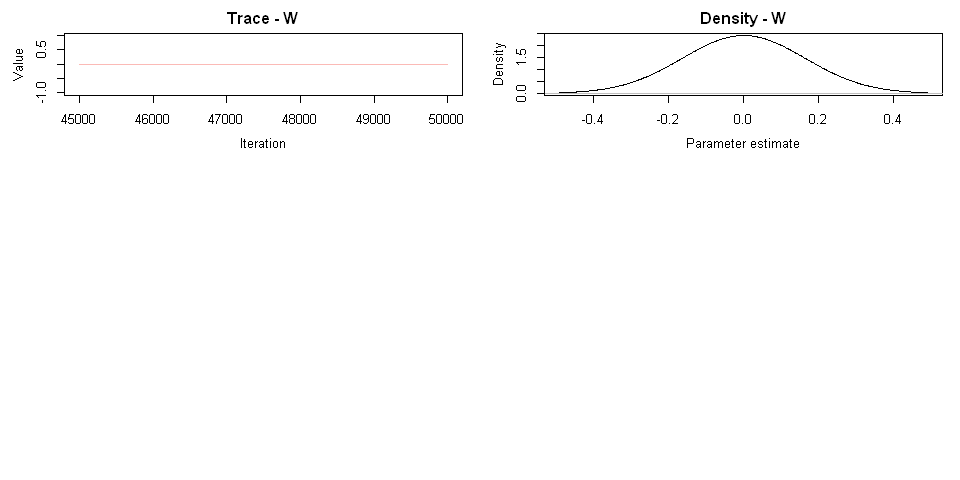

In [72]:
model_string = "
model {

    # Cloudy ... 0 => False, 1 => True
    C ~ dbern(0.5)

    # Sprinkler ... 0 => False, 1 => True
    #   NB. This can be written 
    #   S_CPT = c(0.5, 0.1)
    #   S ~ dbern(S_CPT[C+1])
    pS = ifelse(C==0, 0.5, 0.1)
    S ~ dbern(pS)

    # Rain ... 0 => False, 1 => True
    pR = ifelse(C==0, 0.2, 0.8)
    R ~ dbern(pR)

    # Wet Grass ... 0 => False, 1 => True
    pW = ifelse(S==0 && R==0, 0.0,
         ifelse(S==0 && R==1, 0.9,
         ifelse(S==1 && R==0, 0.9,
         ifelse(S==1 && R==1, 0.99, 100))))
    W ~ dbern(pW)
}
"

model = jags.model(textConnection(model_string),
                   data=list(W=0))

update(model, 10000, progress.bar="none")

samp <- coda.samples(model, 
                     variable.names=c("C", "S", "R", "W"), 
                     n.iter=50000, progress.bar="none")

MCMCtrace(samp,
          pdf=FALSE)

In [74]:
calc_prob_true = function(samples) {
    100.0 * length(which(samples == 1)) / length(samples)
}

cat("P(C=True) =", calc_prob_true(as.matrix(samp)[,"C"]), "%\n")
cat("P(S=True) =", calc_prob_true(as.matrix(samp)[,"S"]), "%\n")
cat("P(R=True) =", calc_prob_true(as.matrix(samp)[,"R"]), "%\n")
cat("P(W=True) =", calc_prob_true(as.matrix(samp)[,"W"]), "%\n")

P(C=True) = 35.844 %
P(S=True) = 6.204 %
P(R=True) = 11.772 %
P(W=True) = 0 %
